In [1]:
import pandas as pd

In [3]:
df=pd.read_csv(r'C:\Users\user\Desktop\task\House_Rent_Dataset.csv')

In [4]:
df.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [25]:
df.shape

(4746, 12)

# 1.which of our family tenant pays less than 10000?

In [6]:
df['Tenant Preferred'].unique()

array(['Bachelors/Family', 'Bachelors', 'Family'], dtype=object)

In [9]:
family=df[(df['Tenant Preferred']=='Family') & (df['Rent']<=10000)]

In [11]:
family.shape

(50, 12)

# 2.what is the highest and lowest paid rent base on the numbers of the bathroom?

In [12]:
df.head(2)

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner


In [15]:
df['Bathroom'].unique()

array([ 2,  1,  3,  5,  4,  6,  7, 10], dtype=int64)

In [17]:
df['Bathroom'].value_counts()

2     2291
1     1474
3      749
4      156
5       60
6       12
7        3
10       1
Name: Bathroom, dtype: int64

# MAX()

In [21]:
df.groupby('Bathroom')['Rent','Tenant Preferred'].max()

C:\Users\user\AppData\Local\Temp/ipykernel_8528/3816764235.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('Bathroom')['Rent','Tenant Preferred'].max()


,Rent,Tenant Preferred
Bathroom,,
1,100000,Family
2,600000,Family
3,3500000,Family
4,1200000,Family
5,680000,Family
6,400000,Bachelors/Family
7,150000,Bachelors/Family
10,200000,Bachelors/Family


# MIN()

In [22]:
df.groupby('Bathroom')['Rent','Tenant Preferred'].min()

C:\Users\user\AppData\Local\Temp/ipykernel_8528/2223692714.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('Bathroom')['Rent','Tenant Preferred'].min()


,Rent,Tenant Preferred
Bathroom,,
1,1500,Bachelors
2,3200,Bachelors
3,1200,Bachelors
4,15000,Bachelors
5,27000,Bachelors
6,20000,Bachelors
7,35000,Bachelors
10,200000,Bachelors/Family


# 3.which city has the most costly rent price

In [24]:
df['City'].unique()

array(['Kolkata', 'Mumbai', 'Bangalore', 'Delhi', 'Chennai', 'Hyderabad'],
      dtype=object)

In [30]:
city=df.groupby('City')['Rent','Bathroom'].max()

C:\Users\user\AppData\Local\Temp/ipykernel_8528/371732749.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  city=df.groupby('City')['Rent','Bathroom'].max()


In [31]:
city

,Rent,Bathroom
City,,
Bangalore,3500000,5
Chennai,600000,6
Delhi,530000,7
Hyderabad,400000,10
Kolkata,180000,3
Mumbai,1200000,6


In [29]:
import matplotlib.pyplot as plt

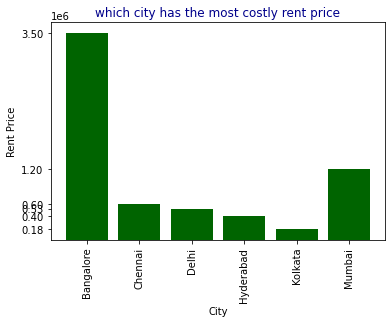

In [36]:
city_plot=[m for m,ss in df.groupby('City')]

plt.bar(city_plot,city['Rent'],color='darkgreen')
plt.title('which city has the most costly rent price',color='darkblue')
plt.ylabel('Rent Price')
plt.xlabel('City')
plt.xticks(rotation='vertical')
plt.yticks(city['Rent'])
plt.show()

# 4.how many apartments are Unfurnished for each and very city

In [38]:
df.head(2)

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner


In [41]:
df['Furnishing Status'].unique()

array(['Unfurnished', 'Semi-Furnished', 'Furnished'], dtype=object)

In [48]:
df.groupby('City')['Furnishing Status'].value_counts()

City       Furnishing Status
Bangalore  Semi-Furnished       584
           Unfurnished          211
           Furnished             91
Chennai    Semi-Furnished       448
           Unfurnished          362
           Furnished             81
Delhi      Semi-Furnished       278
           Unfurnished          230
           Furnished             97
Hyderabad  Semi-Furnished       402
           Unfurnished          355
           Furnished            111
Kolkata    Unfurnished          321
           Semi-Furnished       142
           Furnished             61
Mumbai     Semi-Furnished       397
           Unfurnished          336
           Furnished            239
Name: Furnishing Status, dtype: int64